# DSCI 632: Applied Cloud Computing <br> Term Project Phase 2: Predicting strokes using PYSPARK



## Group members 
- Group member 
    - Name: Amira Bendjama
    - Email: ab4745@drexel.edu
- Group member 
    - Name: Hannah Wurzel
    - Email: td688@drexel.edu
- Group member 
    - Name: Srinivas Pai
    - Email: sp3822@drexel.edu

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz 
!tar xvf spark-3.3.2-bin-hadoop3.tgz
!pip install -q findspark
!pip install pyspark==3.3.2
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.3.2-bin-hadoop3"


Mounted at /content/drive


In [1]:
# comment this 
import findspark
findspark.init()

import os
os.environ["JAVA_HOME"] = "C:\\Program Files\\Java\\jdk1.8.0_361"
os.environ["SPARK_HOME"] = "C:\\Users\\mira\\anaconda3\\lib\\site-packages\\pyspark"


In [2]:
from pyspark.sql import SparkSession
spark= SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate() 

## Data Cleanup

In [4]:
# df = spark.read.format('csv').option('header', 'true').option('inferSchema', 'true').load('/content/drive/MyDrive/Drexel/Winter2023/DSCI632/final/healthcare-dataset-stroke-data.csv')

df = spark.read.format('csv').option('header', 'true').option('inferSchema', 'true').load('healthcare-dataset-stroke-data.csv')

In [5]:
df.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

In [6]:
df.count()

5110

In [7]:
print("Unique Gender Values: ", df.select('gender').distinct().collect())
print("Unique Hypertension Values: ", df.select('hypertension').distinct().collect())
print("Unique Heart Disease Values: ", df.select('heart_disease').distinct().collect())
print("Unique Married Values: ", df.select('ever_married').distinct().collect())
print("Unique Work Type Values: ", df.select('work_type').distinct().collect())
print("Unique Residence Type Values: ", df.select('residence_type').distinct().collect())
print("Unique Glucose Level Values: ", df.select('avg_glucose_level').distinct().collect())
print("Unique BMI Values: ", df.select('bmi').distinct().collect())
print("Unique Smoking Status Values: ", df.select('smoking_status').distinct().collect())

Unique Gender Values:  [Row(gender='Female'), Row(gender='Other'), Row(gender='Male')]
Unique Hypertension Values:  [Row(hypertension=1), Row(hypertension=0)]
Unique Heart Disease Values:  [Row(heart_disease=1), Row(heart_disease=0)]
Unique Married Values:  [Row(ever_married='No'), Row(ever_married='Yes')]
Unique Work Type Values:  [Row(work_type='Never_worked'), Row(work_type='Self-employed'), Row(work_type='Private'), Row(work_type='children'), Row(work_type='Govt_job')]
Unique Residence Type Values:  [Row(residence_type='Urban'), Row(residence_type='Rural')]
Unique Glucose Level Values:  [Row(avg_glucose_level=242.52), Row(avg_glucose_level=60.98), Row(avg_glucose_level=76.46), Row(avg_glucose_level=98.09), Row(avg_glucose_level=73.73), Row(avg_glucose_level=78.75), Row(avg_glucose_level=75.29), Row(avg_glucose_level=79.89), Row(avg_glucose_level=77.19), Row(avg_glucose_level=206.4), Row(avg_glucose_level=61.78), Row(avg_glucose_level=151.25), Row(avg_glucose_level=95.57), Row(avg_g

Unique BMI Values:  [Row(bmi='34.4'), Row(bmi='47.5'), Row(bmi='20.5'), Row(bmi='38.3'), Row(bmi='45.4'), Row(bmi='38.5'), Row(bmi='26.5'), Row(bmi='51'), Row(bmi='48.1'), Row(bmi='29.4'), Row(bmi='16.6'), Row(bmi='14.2'), Row(bmi='12.8'), Row(bmi='26.7'), Row(bmi='17.1'), Row(bmi='36.1'), Row(bmi='30.1'), Row(bmi='40.1'), Row(bmi='54'), Row(bmi='15'), Row(bmi='22.4'), Row(bmi='54.2'), Row(bmi='39.6'), Row(bmi='40.9'), Row(bmi='45.1'), Row(bmi='44.6'), Row(bmi='19.3'), Row(bmi='18.1'), Row(bmi='44.9'), Row(bmi='15.8'), Row(bmi='32.7'), Row(bmi='29'), Row(bmi='22.5'), Row(bmi='28.7'), Row(bmi='42'), Row(bmi='53.5'), Row(bmi='36.8'), Row(bmi='55.1'), Row(bmi='16.4'), Row(bmi='15.7'), Row(bmi='57.2'), Row(bmi='30.9'), Row(bmi='30'), Row(bmi='35.8'), Row(bmi='35.9'), Row(bmi='16.7'), Row(bmi='34'), Row(bmi='21.5'), Row(bmi='40.8'), Row(bmi='45.9'), Row(bmi='17.6'), Row(bmi='23.8'), Row(bmi='50.2'), Row(bmi='24.5'), Row(bmi='37.2'), Row(bmi='49.2'), Row(bmi='61.6'), Row(bmi='22.8'), Row(bmi

From the above code, we can see that the BMI column contains N/A's.  We will remove these values.

In [8]:
df = df.filter(df.bmi != 'N/A')

In [9]:
# removing rows that contain N/A so we now have 4909 rows of data
df.count()

4909

Now we have to transform our categorical variables to numerical values.

In [10]:
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

gender_indexer = StringIndexer(inputCol="gender", outputCol="genderIndex")
ever_married_indexer = StringIndexer(inputCol="ever_married", outputCol="ever_marriedIndex")
work_type_indexer = StringIndexer(inputCol="work_type", outputCol="work_typeIndex")
residence_type_indexer = StringIndexer(inputCol="Residence_type", outputCol="Residence_typeIndex")
bmi_indexer = StringIndexer(inputCol="bmi", outputCol="bmiIndex")
smoking_status_indexer = StringIndexer(inputCol="smoking_status", outputCol="smoking_statusIndex")

onehotencoder_gender_vector = OneHotEncoder(inputCol="genderIndex", outputCol="gender_vec")
onehotencoder_work_type_vector = OneHotEncoder(inputCol="work_typeIndex", outputCol="work_type_vec")
onehotencoder_resdience_type_vector = OneHotEncoder(inputCol="Residence_typeIndex", outputCol="residence_type_vec")
onehotencoder_smoking_status_vector = OneHotEncoder(inputCol="smoking_statusIndex", outputCol="smoking_status_vec")

pipeline = Pipeline(stages=[gender_indexer, ever_married_indexer, work_type_indexer, residence_type_indexer, bmi_indexer, smoking_status_indexer,
                            onehotencoder_gender_vector, onehotencoder_work_type_vector, onehotencoder_resdience_type_vector, onehotencoder_smoking_status_vector])

In [11]:
df_transformed = pipeline.fit(df).transform(df)
df_transformed.show(5)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+-----------+-----------------+--------------+-------------------+--------+-------------------+-------------+-------------+------------------+------------------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|genderIndex|ever_marriedIndex|work_typeIndex|Residence_typeIndex|bmiIndex|smoking_statusIndex|   gender_vec|work_type_vec|residence_type_vec|smoking_status_vec|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+-----------+-----------------+--------------+-------------------+--------+-------------------+-------------+-------------+------------------+------------------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|form

Now we'll create the features column which contains all of the values needed for training.

In [12]:
cols = ["age", "hypertension", "heart_disease", "avg_glucose_level", "ever_marriedIndex", "bmiIndex", "gender_vec", "work_type_vec", "residence_type_vec", "smoking_status_vec"]
assembler = VectorAssembler(inputCols=cols, outputCol='features')

df_features = assembler.transform(df_transformed)

In [13]:
df_features.show(5)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+-----------+-----------------+--------------+-------------------+--------+-------------------+-------------+-------------+------------------+------------------+--------------------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|genderIndex|ever_marriedIndex|work_typeIndex|Residence_typeIndex|bmiIndex|smoking_statusIndex|   gender_vec|work_type_vec|residence_type_vec|smoking_status_vec|            features|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+-----------+-----------------+--------------+-------------------+--------+-------------------+-------------+-------------+------------------+------------------+--------------------+
| 9046|  Male|67.0|           0|            1|      

## Exploratory Data Analysis: 

https://insaid.medium.com/eda-with-pyspark-1f29b7d1618 
https://towardsdatascience.com/handyspark-bringing-pandas-like-capabilities-to-spark-dataframes-5f1bcea9039e

In [14]:
!pip install handyspark

In [83]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from handyspark import *
hdf = df.toHandy()
hdf.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         Yes|Self-employed|         Rural|           174.12|  24|   never smoked|     1|
|56669|  Male|81.0|           0|            0|         

gender
Female    2897
Male      2011
Other        1
Name: value_counts, dtype: int64

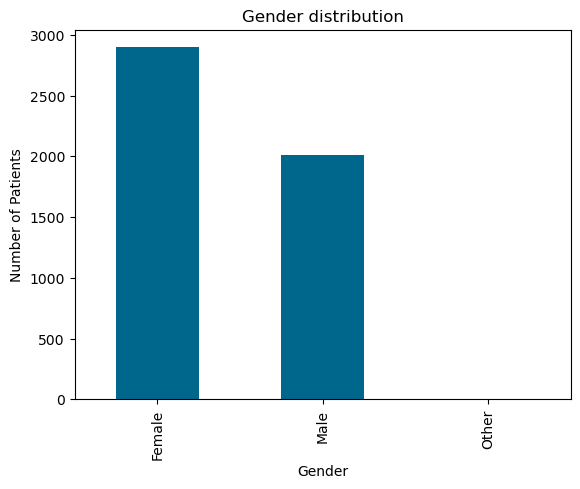

In [76]:
from matplotlib import pyplot as plt

# gender distribution
hdf.cols['gender'].value_counts().plot(kind='bar', title = 'Gender distribution', xlabel='Gender', ylabel='Number of Patients',color='#00678c') 
hdf.cols['gender'].value_counts() 

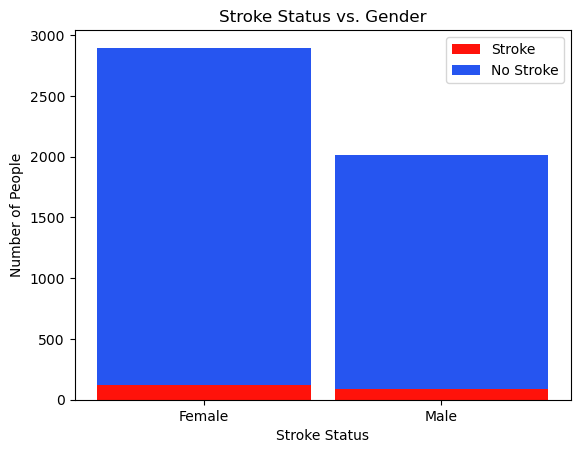

In [77]:
from pyspark.sql.functions import count

# count of females and males that had and didn't have strokes
female = hdf[hdf['gender'] == 'Female']
fstrokeY = female[female['stroke'] == 1]
fstrokeN = female[female['stroke'] == 0]

male = hdf[hdf['gender'] == 'Male']
mstrokeY = male[male['stroke'] == 1]
mstrokeN = male[male['stroke'] == 0]


# chart
status = ['Female', 'Male']
stro = [fstrokeY.count(), mstrokeY.count()]
nostro = [fstrokeN.count(), mstrokeN.count()]

plt.bar(status, stro,  0.9, color = '#ff120a', label='Stroke')
plt.bar(status, nostro, 0.9, bottom = stro, color = '#2655f0', label='No Stroke')

plt.xlabel("Stroke Status")
plt.ylabel("Number of People")
plt.title('Stroke Status vs. Gender')
plt.legend()
plt.show()


#### Age distribution
